In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


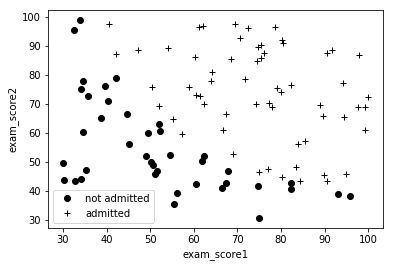

In [3]:
df=pd.read_csv(r"C:\Users\user\Documents\Machine learning\machine-learning-ex2\ex2\ex2data1.txt",header=None,names = ['exam_score1','exam_score2','admitted']  )

neg=df[df['admitted']==0]
pos=df[df['admitted']==1]

plt.plot(neg['exam_score1'],neg['exam_score2'],'ko',label='not admitted')
plt.plot(pos['exam_score1'],pos['exam_score2'],'k+',label='admitted')
plt.xlabel('exam_score1')
plt.ylabel('exam_score2')
plt.legend()      ###   it shows label as points to which they belong


In [4]:
#######  FUNCTION FOR CALCULATING THE SIGMOID

In [5]:
def sigmoid(x):
    ##IF X IS INTEGER
    if type(x) == int:  
        y=1/(1+np.exp(-x))
        return y

    elif type(x) == type([]): 
        
        for i in range(len(x)):
            x[i]=1/(1+np.exp(-x[i]))
        return x
    
    elif type(x) == np.ndarray: 
        y=np.zeros(x.shape)
        y=1/(1+np.exp(-x))
        
        return y
    
print (sigmoid(-6))

print(sigmoid([1,0,-56,4]))

n=np.array([[1,0.2,4,5],[4,5,6,7],[8,3,4,2]])

print(sigmoid(n))

0.0024726231566347743
[0.7310585786300049, 0.5, 4.780892883885469e-25, 0.9820137900379085]
[[0.73105858 0.549834   0.98201379 0.99330715]
 [0.98201379 0.99330715 0.99752738 0.99908895]
 [0.99966465 0.95257413 0.98201379 0.88079708]]


In [6]:
####  COMPUTING COST FUNCTION

In [7]:

x1 = np.array(df['exam_score1'])
x2 = np.array(df['exam_score2'])
y = np.array(df['admitted'])
#making lists
x1=[x1[i] for i in range(len(x1))] ####  CONVERTING ARRAY TO LIST
x2=[x2[i] for i in range(len(x2))] ####  CONVERTING ARRAY TO LIST
#print(x1)

#print(x2)

In [8]:
### Initializing theta

theta = np.array([[-24],[0.2],[0.2]])
print(theta.shape)

(3, 1)


In [9]:

#creating the matrix X by adding column of ones

lst = [1 for i in range(len(x1))]
X = np.array([lst,x1,x2])
X=X.transpose()
Y = y.reshape(len(y),1)



In [10]:
##### defining the hypothesis

def hypothesis(theta,X):
   ## theta_transpose=theta.transpose()
    ## minus theta_transpose*X
#   print(theta_transpose)
#   print(theta)
      ## theta_transpose*X
#   print(a)
    
  # print(type(a))
    hypo=sigmoid(X.dot(theta))    ####calling the sigmoid function
    return hypo



#theta = np.array([[-24,0.2,0.2]])    ##theta values

hypo=hypothesis(theta,X)         #####returning the hyposthesis array  
'''
print(hypo)
print()
print(type(hypo))

'''

'\nprint(hypo)\nprint()\nprint(type(hypo))\n\n'

In [11]:
def computeCost(theta,X,Y,mylambda=0.):
    term1 = np.dot(-np.array(Y).T,np.log(hypothesis(theta,X)))
    term2 = np.dot((1-np.array(Y)).T,np.log(1-hypothesis(theta,X)))
  #  regterm = (mylambda/2) * np.sum(np.dot(theta[1:].T,theta[1:])) #Skip theta0 most important thing to note that summation 
    return float( (1./len(Y)) * ( np.sum(term1 - term2) ) )              ##start from theta zero we dotted it from 1
computeCost(theta,X,Y)

0.21833019382659785

In [12]:
######## C0MPUTING THE GRADIENT  ##########  NOTE that there is no gradient descent


In [13]:
def gradient(Y,theta,X):
    
    return (X.transpose()).dot(hypothesis(theta,X)-Y)/len(Y)
    
    

In [14]:
###calling gradient function

gradient(Y,theta,X)


array([[0.04290299],
       [2.56623412],
       [2.64679737]])

In [15]:
 ##########  OPTIMIZING AND CALCULATING BEST THETA VALUES

In [16]:
from scipy.optimize import minimize


In [17]:
print(theta.shape)
from scipy import optimize

######   this optimize function optimizes the function over number of iterations and tell us the best possible theta 
######   and the minimum cost
def optimizeTheta(mytheta,myX,myy,mylambda=0.):
    print (mytheta.shape)
    result = optimize.fmin(computeCost, x0=mytheta, args=(myX, myy,mylambda), maxiter=50, full_output=True)
    return result[0], result[1]


(3, 1)


In [18]:
Y = Y.ravel()
print(theta.shape)
theta=theta.flatten()
theta, mincost = optimizeTheta(theta,X,Y)
print(theta)
mincost

(3, 1)
(3,)
[-24.83001234   0.20322146   0.19911052]


0.20351851260946544

In [19]:
 ####  PLOTTING THE DECISION BOUNDARY


In [20]:
def plotDecisionBoundary(theta, X, Y):
    plt.plot(neg['exam_score1'],neg['exam_score2'],'ko',label='not admitted')
    plt.plot(pos['exam_score1'],pos['exam_score2'],'k+',label='admitted')
    
    plt.xlabel('exam_score1')
    plt.ylabel('exam_score2')
    plt.legend()
                            #### plotting the line by making x2 as a function of x1 or we can say y=mx+c equation  ########
    plt.plot(X[:,1], ( -theta[0] - theta[1]*X[:,1] )/theta[2]  )
    

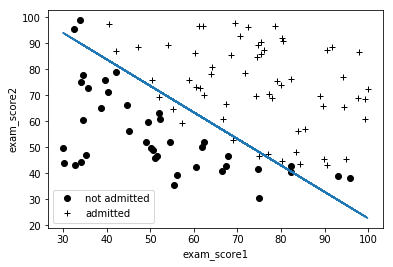

In [21]:
plotDecisionBoundary(theta, X, Y)

In [22]:
  ### predicting the output   ####
x=[1,45,85]
prob = sigmoid([x[0]*theta[0]+x[1]*theta[1]+x[2]*theta[2]])
print(prob)



[0.7754504292711576]


In [23]:
####   getting the accuracy of predticton   

pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

#####m      method 1

'''
def predict1(theta,X):
    return hypothesis(theta,X) >= 0.5

def predict2(theta,X):
    return hypothesis(theta,X) < 0.5

print(predict1(theta,pos).sum())
print(predict2(theta,neg).sum())
'''

###         method 2
def predict(theta,X):
    return hypothesis(theta,X) >= 0.5


pos_correct = float(np.sum(predict(theta,pos)))
neg_correct = float(np.sum(np.invert(predict(theta,neg))))
print(pos_correct)
neg_correct

55.0


35.0

In [24]:

count=0
hypo_value = hypothesis(theta,X).reshape(len(X),1)
print(hypo_value.shape)
print (hypo_value[0])
for i in range(len(hypo_value)):
    if hypo_value[i]>=0.5 and Y[i]==1:
        count+=1
    elif hypo_value[i]<0.5 and Y[i]==0:
        count+=1
count

(100, 1)
[0.09464411]


90

(<Figure size 432x288 with 221 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000026CDE930F60>,
       dtype=object))

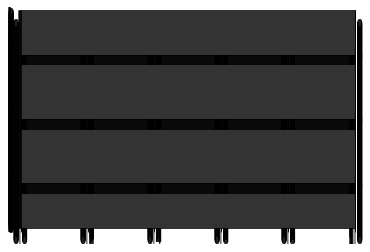